In [1]:
import { display } from 'tslab'
import Jimp from "jimp"
import cv from "@techstark/opencv-js"

In [2]:
// notebook util functions
async function print(imageMat: cv.Mat) {
  const invoke = async () => {
    const outputImage = new Jimp({
      width: imageMat.cols,
      height: imageMat.rows,
      data: Buffer.from(imageMat.data)
    })
    display.png((await outputImage.getBufferAsync(outputImage.getMIME())))
  }
  if (imageMat.type() === cv.CV_8UC1) {
    cv.cvtColor(imageMat, imageMat, cv.COLOR_GRAY2RGBA, 0)
    await invoke()
    cv.cvtColor(imageMat, imageMat, cv.COLOR_RGBA2GRAY, 0)
    return
  }
  await invoke()
}

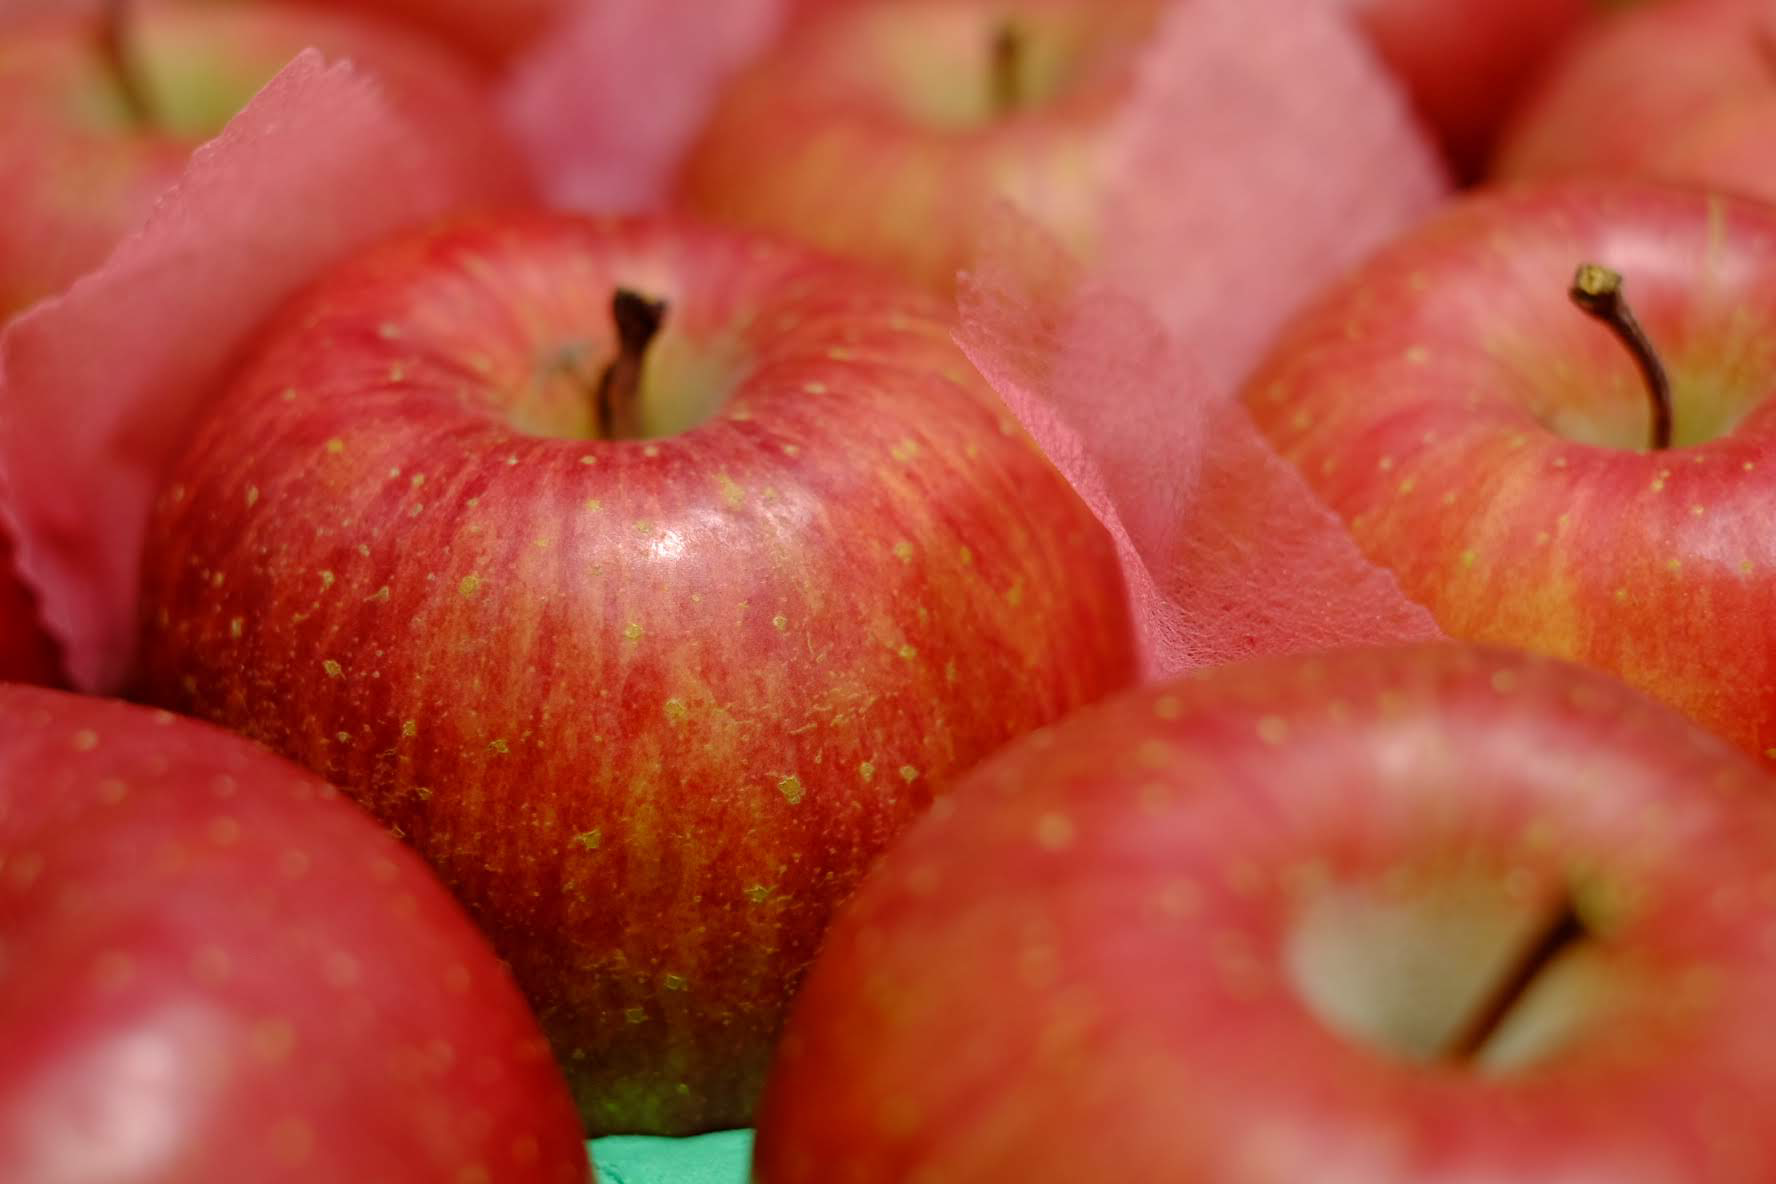

In [3]:
const image = await Jimp.read("../images/apple.jpg")
const imageMat = cv.matFromImageData(image.bitmap)
await print(imageMat)

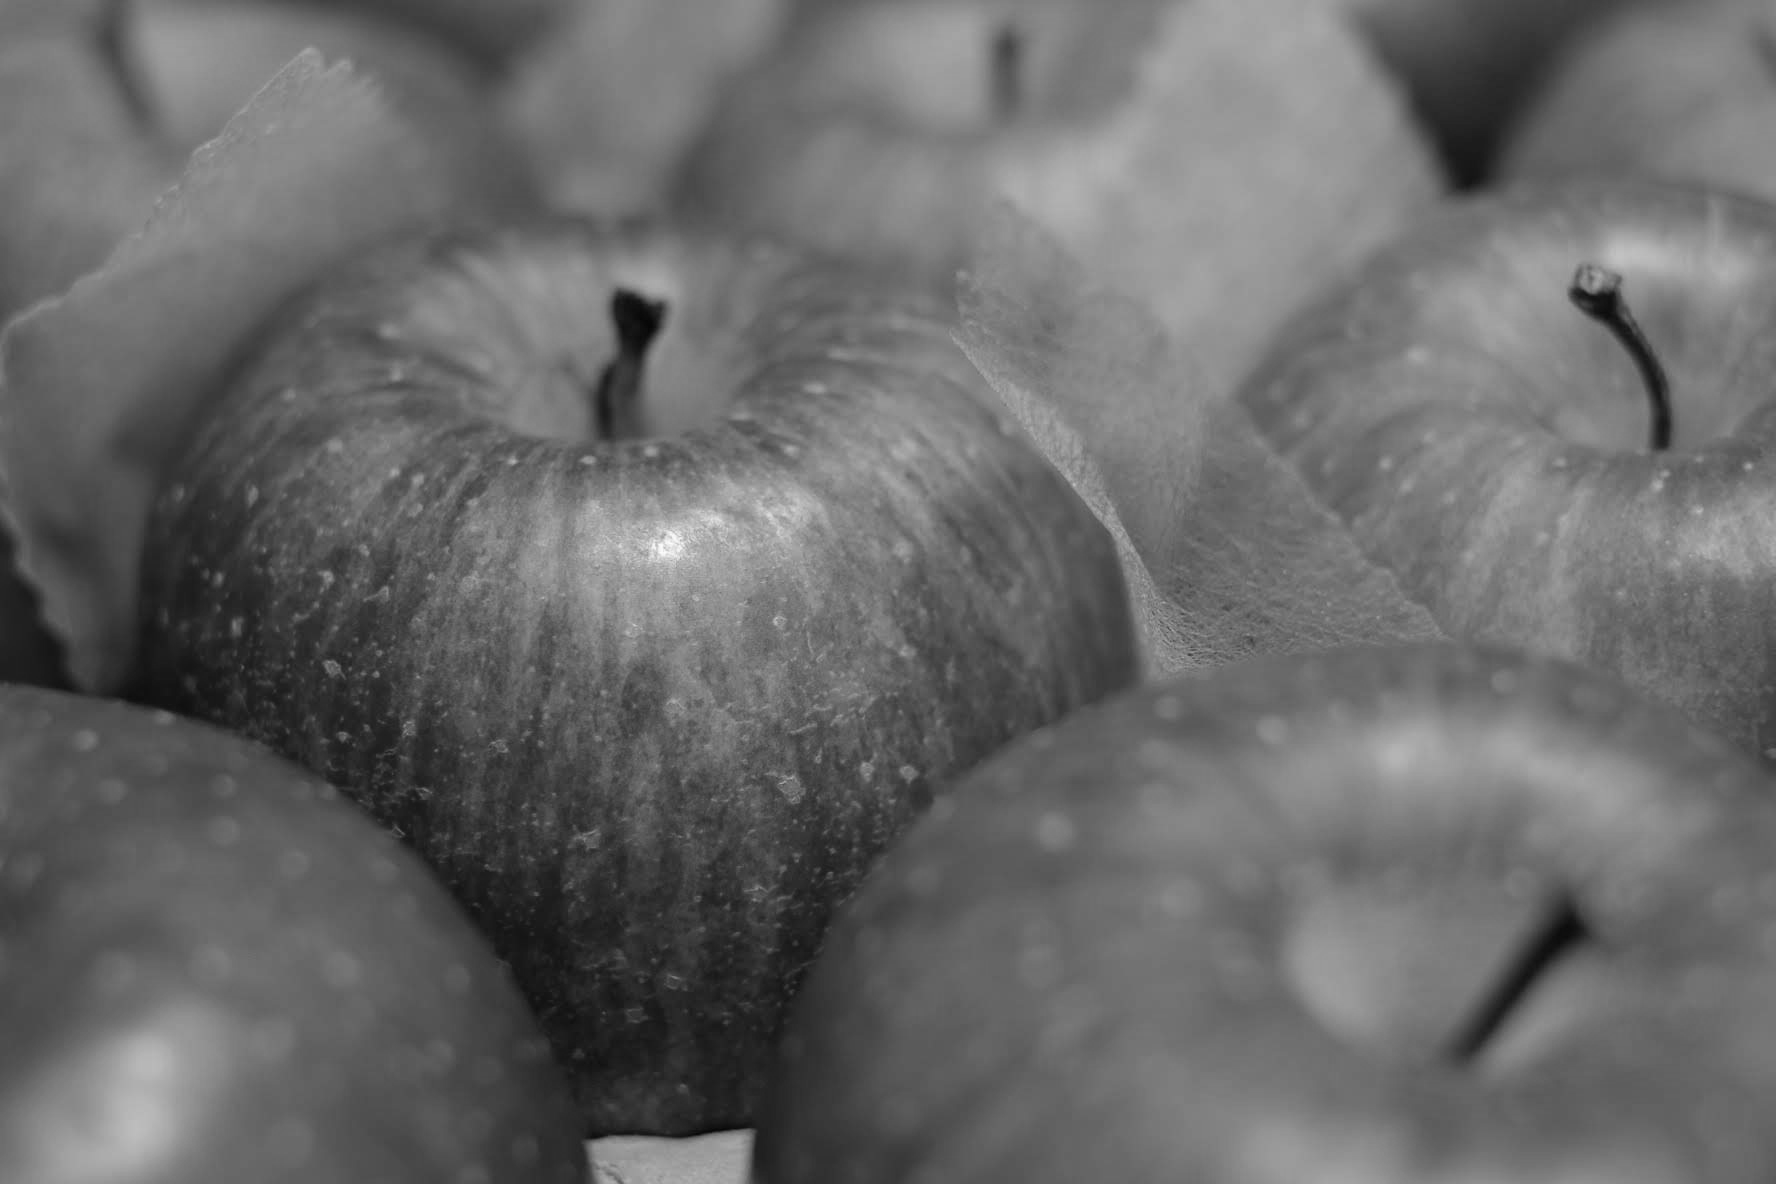

In [4]:
const workImage = new cv.Mat()
cv.cvtColor(imageMat, workImage, cv.COLOR_RGBA2GRAY, 0)
await print(workImage)